## Face & Eye Detection using HAAR Cascade Classifiers

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

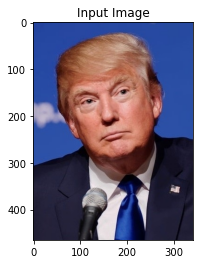

In [2]:
# Load our image then convert it to grayscale
image = cv2.imread('../../images/Trump.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
cv2.imwrite('input_image.jpg', image)

plt.show()

<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_4699/1575016518.py:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


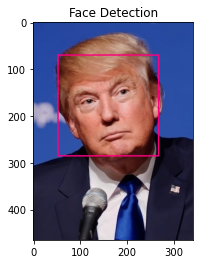

In [3]:
# We point OpenCV's CascadeClassifier function to where our 
# classifier (XML file format) is stored
face_classifier = cv2.CascadeClassifier('../../Haarcascades/haarcascade_frontalface_default.xml')

# Our classifier returns the ROI of the detected face as a tuple
# It stores the top left coordinate and the bottom right coordiantes
faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No faces found")

# We iterate through our faces array and draw a rectangle
# over each face in faces
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Face Detection')
    cv2.imwrite('face_detection.jpg', image); plt.show()

### Let's combine face and eye detection

In [4]:
eye_classifier = cv2.CascadeClassifier('../../Haarcascades/haarcascade_eye.xml')
face_classifier = cv2.CascadeClassifier('../../Haarcascades/haarcascade_frontalface_default.xml')

<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_4699/3758430886.py:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


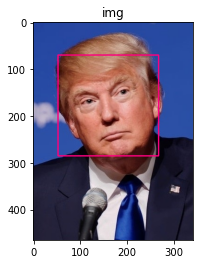

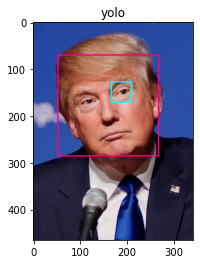

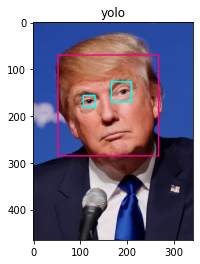

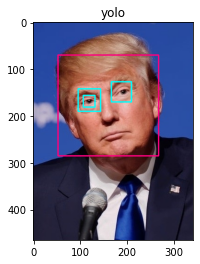

In [5]:
img = cv2.imread('../../images/Trump.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('img'); plt.show()
    cv2.imwrite('img.jpg', image)
    
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('yolo'); plt.show()
        cv2.imwrite('img_v2.jpg', img)

### Let's make a live face & eye detection, keeping the face inview at all times

In [9]:
face_classifier = cv2.CascadeClassifier('../../Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('../../Haarcascades/haarcascade_eye.xml')
def face_detector(img, size=0.5):

    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return img
    
    for (x,y,w,h) in faces:
        x = x - 50
        w = w + 50
        y = y - 50
        h = h + 50
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_classifier.detectMultiScale(roi_gray)
        
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2) 
            
    roi_color = cv2.flip(roi_color,1)
    return roi_color

cap = cv2.VideoCapture(0)
v = 0
while True:
    if v == 5:
        break
    ret, frame = cap.read()
    
    plt.imshow(cv2.cvtColor(face_detector(frame), cv2.COLOR_BGR2RGB))
    plt.title('Our Face Extractor'); plt.show()
    cv2.imwrite('my_face.jpg', face_detector(frame))

    #cv2.imshow('Our Face Extractor', face_detector(frame))
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
    v += 1
cap.release()
cv2.destroyAllWindows()      

None


<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_4699/837050168.py:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():
[ WARN:0@1574.824] global /io/opencv/modules/videoio/src/cap_v4l.cpp (889) open VIDEOIO(V4L2:/dev/video0): can't open camera by index


AttributeError: 'NoneType' object has no attribute 'shape'

In [8]:
cap.release()
cv2.destroyAllWindows()   

### Tuning Cascade Classifiers

*ourClassifier*.**detectMultiScale**(input image, **Scale Factor** , **Min Neighbors**)

- **Scale Factor**
Specifies how much we reduce the image size each time we scale. E.g. in face detection we typically use 1.3. This means we reduce the image by 30% each time it’s scaled. Smaller values, like 1.05 will take longer to compute, but will increase the rate of detection.



- **Min Neighbors**
Specifies the number of neighbors each potential window should have in order to consider it a positive detection. Typically set between 3-6. 
It acts as sensitivity setting, low values will sometimes detect multiples faces over a single face. High values will ensure less false positives, but you may miss some faces.  
